In [1]:
from scipy import stats 
import statistics as stat
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

edu_PartialHighSchool = [30000, 10000, 10000, 20000, 70000, 30000, 10000, 20000, 10000, 30000]
edu_Highschool = [20000, 30000, 60000, 20000, 40000, 60000, 60000]
edu_PartialCollege = [60000, 40000, 30000, 130000, 60000, 40000]
edu_Bachelors = [40000, 20000, 90000, 120000, 60000, 130000, 20000, 100000, 80000, 30000, 100000, 120000]
edu_Graduate = [160000, 50000, 80000, 30000,40000,80000,130000, 100000, 130000, 50000, 130000]
print('Partial High School:    ' + str(int(stat.mean(edu_PartialHighSchool)))) 
print( 'High School:           ' + str (int (stat.mean(edu_Highschool))))
print('Partial College:        ' + str(int(stat.mean(edu_PartialCollege))))
print('Bachelors:              ' + str(int(stat.mean (edu_Bachelors))))
print( 'Graduate:              ' + str(int (stat.mean(edu_Graduate))))

Partial High School:    24000
High School:           41428
Partial College:        60000
Bachelors:              75833
Graduate:              89090


In [2]:
t, p = stats.ttest_ind(edu_PartialHighSchool, edu_Highschool)

print(f"t-value: {t}")
print(f"p-value: {p}")

t-value: -1.9131753750607223
p-value: 0.07500898731578687


/var/folders/5n/v4r1bflj5gd3ry2xml0qlzsh0000gp/T/ipykernel_70287/412175547.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(edu_PartialHighSchool, label="Partial Highschool")
/var/folders/5n/v4r1bflj5gd3ry2xml0qlzsh0000gp/T/ipykernel_70287/412175547.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

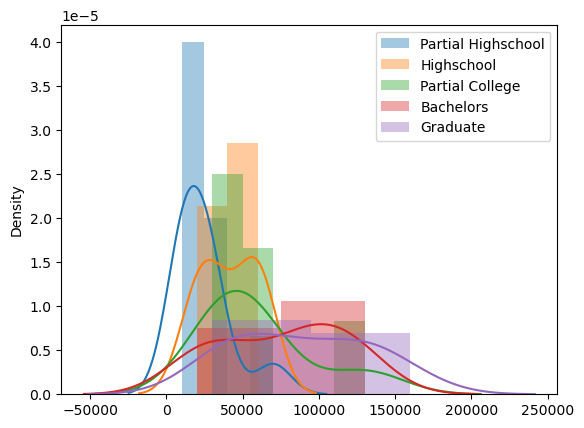

In [3]:
sns.distplot(edu_PartialHighSchool, label="Partial Highschool")
sns.distplot(edu_Highschool, label="Highschool")
sns.distplot(edu_PartialCollege, label="Partial College")
sns.distplot(edu_Bachelors, label="Bachelors")
sns.distplot(edu_Graduate, label="Graduate")
plt.legend()


In [4]:
stats.f_oneway(edu_Bachelors, edu_Graduate, edu_Highschool, edu_PartialCollege, edu_PartialHighSchool)

F_onewayResult(statistic=5.778065095961635, pvalue=0.0008781084858501968)

In [5]:
df = pd.read_csv("./insurance.csv")

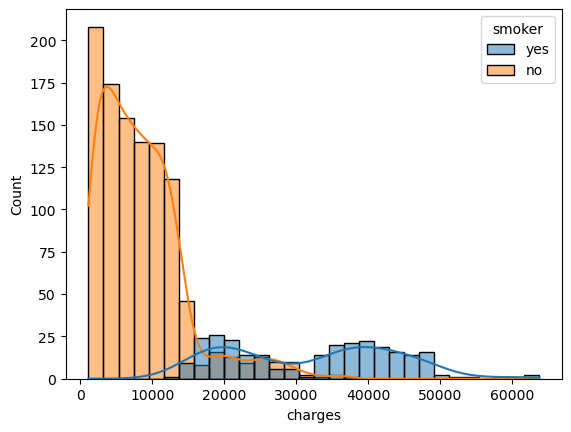

In [6]:
sns.histplot(data=df, x="charges", hue="smoker", kde=True);

In [7]:
smoker_y = df[df["smoker"]== "yes"]
smoker_n = df[df["smoker"]== "no"]

stats.ttest_ind(smoker_y["charges"], smoker_n["charges"])

TtestResult(statistic=46.66492117272371, pvalue=8.271435842179101e-283, df=1336.0)

In [8]:
def anova(feature, label):
  groups = df[feature].unique()
  grouped_values = []
  for group in groups:
    grouped_values.append(df[df[feature]==group][label])
  return stats.f_oneway(*grouped_values)



In [9]:
anova("smoker", "charges")

F_onewayResult(statistic=2177.614868056519, pvalue=8.271435842175444e-283)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("./bikebuyers.csv")
df.head()

,ID,Marital Status,Gender,MaritalStatusNumeric,GenderNumeric,Income,Children,EducationNumeric,CommuteDistanceNumeric,Cars,Age,HomeOwnerNumeric,PurchaseBikeNumeric,Education,Occupation,Home Owner,Commute Distance,Region,Purchased Bike
0,19147,Married,Male,1,0,40000,0,4,1,1,42,0,0,Bachelors,Professional,No,0-1 Miles,North America,No
1,22296,Married,Male,1,0,70000,0,4,1,1,38,0,0,Bachelors,Professional,No,0-1 Miles,North America,No
2,25983,Married,Male,1,0,70000,0,4,1,1,43,0,0,Bachelors,Professional,No,0-1 Miles,North America,No
3,29134,Married,Male,1,0,60000,4,4,5,3,42,0,0,Bachelors,Skilled Manual,No,10+ Miles,North America,No
4,27388,Married,Male,1,0,60000,3,4,2,2,66,0,0,Bachelors,Management,No,1-2 Miles,North America,No


In [11]:
df.Education.unique()

array(['Bachelors', 'Graduate Degree', 'High School', 'Partial College',
       'Partial High School'], dtype=object)

In [12]:
df["Education_rank"] = df["Education"]
df.Education_rank.replace(["Partial High School", "High School", "Partial College", "Bachelors", "Graduate Degree"], [1,2,3,4,5], inplace=True)
df.Education_rank

0      4
1      4
2      4
3      4
4      4
      ..
995    1
996    1
997    1
998    1
999    1
Name: Education_rank, Length: 1000, dtype: int64

In [13]:
df["Commute_rank"] = df["Commute Distance"]
df.Commute_rank.replace(["0-1 Miles","1-2 Miles","2-5 Miles", "5-10 Miles", "10+ Miles"], [0,1,2,5,10], inplace=True)
df.astype({"Commute_rank": "int64"})

,ID,Marital Status,Gender,MaritalStatusNumeric,GenderNumeric,Income,Children,EducationNumeric,CommuteDistanceNumeric,Cars,...,HomeOwnerNumeric,PurchaseBikeNumeric,Education,Occupation,Home Owner,Commute Distance,Region,Purchased Bike,Education_rank,Commute_rank
0,19147,Married,Male,1,0,40000,0,4,1,1,...,0,0,Bachelors,Professional,No,0-1 Miles,North America,No,4,0
1,22296,Married,Male,1,0,70000,0,4,1,1,...,0,0,Bachelors,Professional,No,0-1 Miles,North America,No,4,0
2,25983,Married,Male,1,0,70000,0,4,1,1,...,0,0,Bachelors,Professional,No,0-1 Miles,North America,No,4,0
3,29134,Married,Male,1,0,60000,4,4,5,3,...,0,0,Bachelors,Skilled Manual,No,10+ Miles,North America,No,4,10
4,27388,Married,Male,1,0,60000,3,4,2,2,...,0,0,Bachelors,Management,No,1-2 Miles,North America,No,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,14798,Single,Female,0,1,10000,4,1,1,2,...,1,1,Partial High School,Manual,Yes,0-1 Miles,Europe,Yes,1,0
996,16259,Single,Female,0,1,10000,4,1,1,2,...,1,1,Partial High School,Manual,Yes,0-1 Miles,Europe,Yes,1,0
997,16410,Single,Female,0,1,10000,4,1,1,2,...,1,1,Partial High School,Manual,Yes,0-1 Miles,Europe,Yes,1,0
998,28957,Single,Female,0,1,120000,0,1,5,4,...,1,1,Partial High School,Professional,Yes,10+ Miles,Pacific,Yes,1,10


In [16]:
def clean_bikebuyers():
  df = pd.read_csv("./bikebuyers.csv")
  df["Education_rank"] = df["Education"]
  df["Commute_rank"] = df["Commute Distance"]
  df["Purchased Bike"] = df["Purchased Bike"]
  df.Education_rank.replace(["Partial High School", "High School", "Partial College", "Bachelors", "Graduate Degree"], [1,2,3,4,5], inplace=True)
  df.Commute_rank.replace(["0-1 Miles","1-2 Miles","2-5 Miles", "5-10 Miles", "10+ Miles"], [0,1,2,5,10], inplace=True)
  df["Purchased Bike"].replace(["Yes", "No"], [0,1], inplace=True)
  df.astype({"Education_rank": "int64"})
  df.astype({"Commute_rank": "int64"})
  df["Purchased Bike"].astype("int64")
  return df

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = clean_bikebuyers()

/var/folders/5n/v4r1bflj5gd3ry2xml0qlzsh0000gp/T/ipykernel_70287/697661180.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  viz.set_xticklabels(viz.get_xticklabels(), rotation= 25)


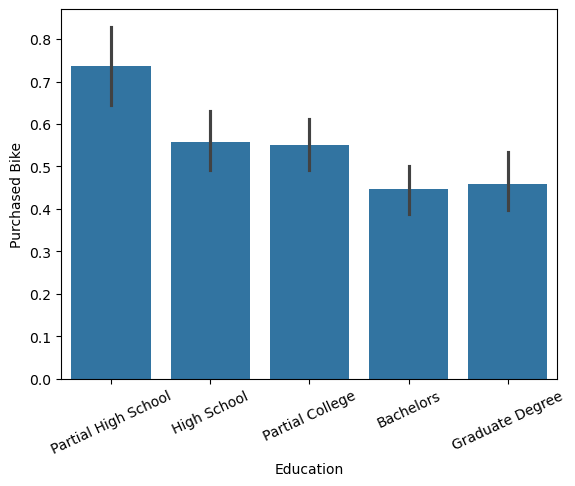

In [34]:
viz = sns.barplot(data=df, x="Education", y="Purchased Bike", 
                  order=["Partial High School", "High School", "Partial College", "Bachelors", "Graduate Degree"])
viz.set_xticklabels(viz.get_xticklabels(), rotation= 25)
plt.show()

/var/folders/5n/v4r1bflj5gd3ry2xml0qlzsh0000gp/T/ipykernel_70287/2849074700.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  viz.set_xticklabels(viz.get_xticklabels(), rotation= 25)


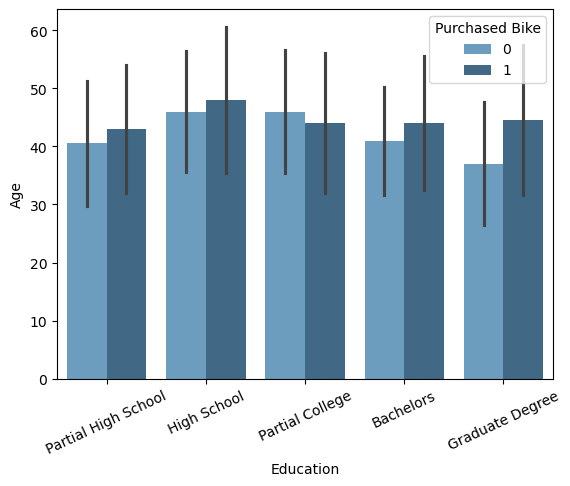

In [45]:
viz = sns.barplot(data=df, x="Education", y="Age", hue="Purchased Bike", estimator=np.median, errorbar="sd", palette="Blues_d",
                  order=["Partial High School", "High School", "Partial College", "Bachelors", "Graduate Degree"])
viz.set_xticklabels(viz.get_xticklabels(), rotation= 25)
plt.show()

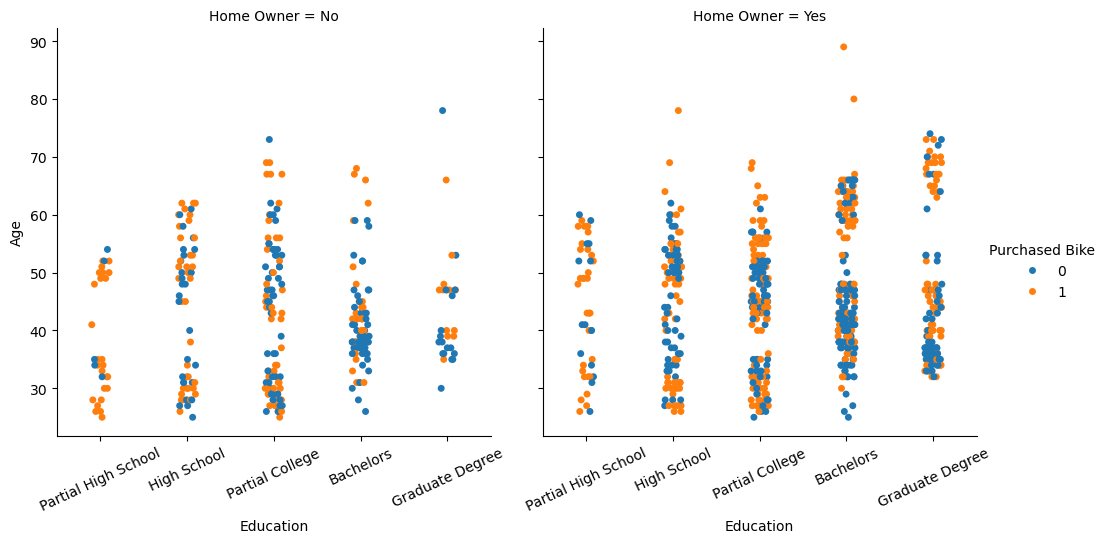

In [56]:
viz = sns.catplot(data=df, x="Education", y="Age", hue="Purchased Bike", col="Home Owner", estimator=np.median, errorbar="sd",
                  order=["Partial High School", "High School", "Partial College", "Bachelors", "Graduate Degree"])
viz.set_xticklabels(rotation= 25)


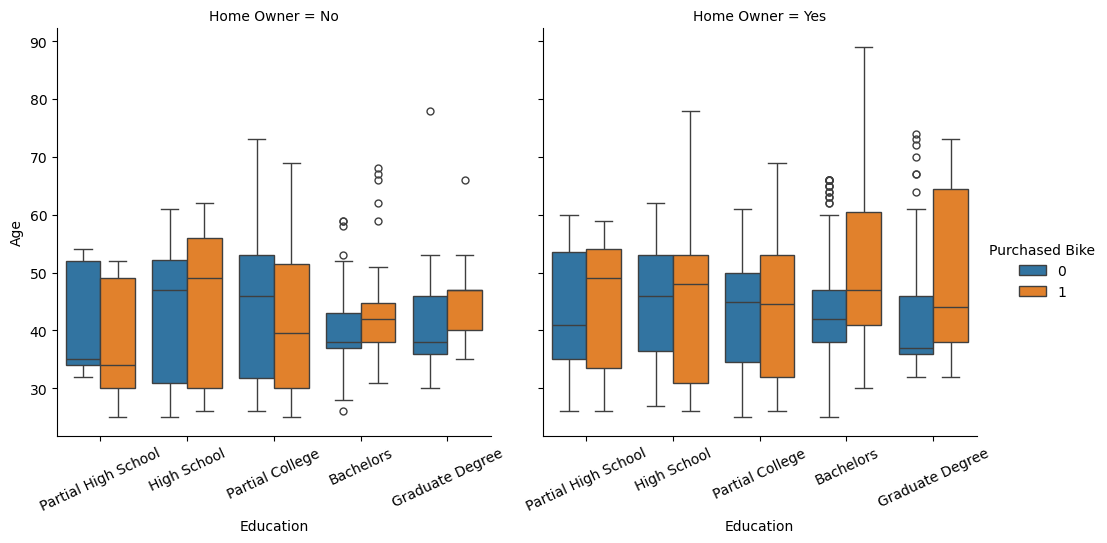

In [59]:
viz = sns.catplot(data=df, x="Education", y="Age", hue="Purchased Bike", col="Home Owner", estimator=np.median, errorbar="sd", kind="box",
                  order=["Partial High School", "High School", "Partial College", "Bachelors", "Graduate Degree"])
viz.set_xticklabels(rotation= 25)

/Users/user/mambaforge/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 9.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/user/mambaforge/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/user/mambaforge/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 11.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/user/mambaforge/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 10.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/user/mambaforge/lib/python3.10/site-packages/seaborn/categorica

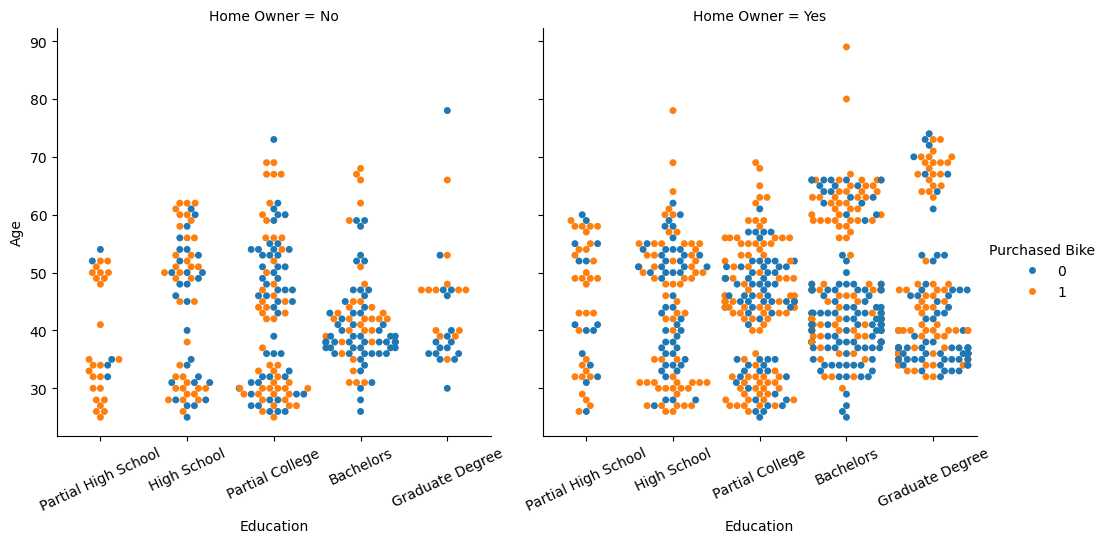

In [61]:
viz = sns.catplot(data=df, x="Education", y="Age", hue="Purchased Bike", col="Home Owner", estimator=np.median, errorbar="sd", kind="swarm",
                  order=["Partial High School", "High School", "Partial College", "Bachelors", "Graduate Degree"])
viz.set_xticklabels(rotation= 25)

In [80]:
from scipy import stats
import pandas as pd

groups = df['Education'].unique()
group_labels = []
for g in groups:
  group_labels.append(df[df['Education'] == g]['Purchased Bike'])

# Now calculate the ANOVA results
F, f_p = stats.f_oneway(*group_labels)

print('F: ' + str(round(F, 4)))
print('p: ' + str(round(p, 4)))

F: 6.4653
p: 0.0036


In [63]:
r, p = stats.pearsonr(df["Education_rank"], df["Purchased Bike"])

print('r: ' + str(round(r, 4)))
print('p: ' + str(round(p, 4)))

r: -0.1408
p: 0.0


In [68]:
partial_high_school = df[df.Education == 'Partial High School']
high_school = df[df.Education == 'High School']
t, p = stats.ttest_ind(partial_high_school['Purchased Bike'], high_school['Purchased Bike'])

print('t: ' + str(round(t, 2)))
print('p: ' + str(round(p, 2)))

t: 2.7
p: 0.01


In [71]:
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df["Purchased Bike"], df["Education"])
print(mc.tukeyhsd())

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1            group2       meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------------
      Bachelors     Graduate Degree   0.0121  0.999 -0.1163 0.1404  False
      Bachelors         High School   0.1109 0.1204 -0.0162 0.2381  False
      Bachelors     Partial College   0.1032 0.0942 -0.0102 0.2166  False
      Bachelors Partial High School   0.2891 0.0001  0.1159 0.4623   True
Graduate Degree         High School   0.0989 0.3297  -0.045 0.2428  False
Graduate Degree     Partial College   0.0912 0.3236 -0.0407  0.223  False
Graduate Degree Partial High School   0.2771 0.0005  0.0913 0.4629   True
    High School     Partial College  -0.0077 0.9998 -0.1385  0.123  False
    High School Partial High School   0.1782 0.0655 -0.0068 0.3632  False
Partial College Partial High School   0.1859 0.0322  0.0101 0.3617   True
--------------------------------------

/var/folders/5n/v4r1bflj5gd3ry2xml0qlzsh0000gp/T/ipykernel_70287/1984618787.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  viz.set_xticklabels(viz.get_xticklabels(), rotation= 25)


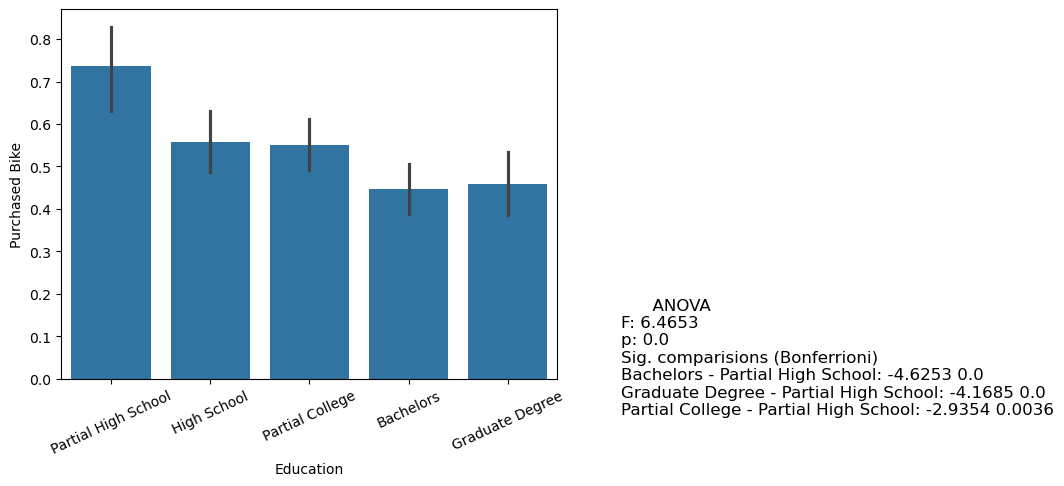

In [87]:
e_types = df.Education.unique()
ttests = []

for i, e in enumerate(e_types):
  for i2, e2 in enumerate(e_types):
    if i2 > i:
      g1 = df[df.Education == e]["Purchased Bike"]
      g2 = df[df.Education == e2]["Purchased Bike"]
      t, p = stats.ttest_ind(g1,g2)
      ttests.append([f"{e} - {e2}:", t.round(4), p.round(4)])

textstr = f"      ANOVA\n"
textstr += f"F: {F.round(4)}\n"
textstr += f"p: {f_p.round(4)}\n"
textstr += f"Sig. comparisions (Bonferrioni)\n"


threshhold = 0.05 / len(ttests)
for t in ttests:
  if t[2] <= threshhold:
    textstr += f"{t[0]} {t[1]} {t[2]}\n" 

viz = sns.barplot(data=df, x="Education", y="Purchased Bike", 
                  order=["Partial High School", "High School", "Partial College", "Bachelors", "Graduate Degree"])
viz.set_xticklabels(viz.get_xticklabels(), rotation= 25)
plt.text(1, 0, textstr, fontsize =12, transform=plt.gcf().transFigure)
plt.show()